In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("D:/FDE/final_project/etl_pipeline/gold_dataset.csv")
df

,AGE_DESC,MARITAL_STATUS_CODE,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,INCOME_DESC,Total_sales,total_visits,median_basket,avg_price,sensitivity
0,65+,A,Homeowner,2 Adults No Kids,2,None/Unknown,35-49K,1727.83,32,53.840,2.522380,Sensible
1,45-54,A,Homeowner,2 Adults No Kids,2,None/Unknown,50-74K,804.59,18,31.415,2.843074,Not sensible
2,25-34,U,Unknown,2 Adults Kids,3,1,25-34K,1864.88,42,28.795,2.993387,Sensible
3,25-34,U,Homeowner,2 Adults Kids,4,2,75-99K,5158.62,109,36.250,5.895566,Sensible
4,45-54,B,Homeowner,Single Female,1,None/Unknown,50-74K,1047.10,58,14.370,2.991714,Not sensible
...,...,...,...,...,...,...,...,...,...,...,...,...
755,35-44,U,Homeowner,2 Adults No Kids,2,None/Unknown,50-74K,722.96,11,48.790,4.061573,Sensible
756,45-54,A,Homeowner,Unknown,3,1,75-99K,1601.56,21,79.970,3.152677,Sensible
757,45-54,U,Unknown,Single Male,1,None/Unknown,35-49K,2816.58,100,17.055,3.426496,Not sensible
758,25-34,U,Homeowner,2 Adults No Kids,2,None/Unknown,50-74K,701.99,48,10.175,2.877008,Not sensible


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_DESC             760 non-null    object 
 1   MARITAL_STATUS_CODE  760 non-null    object 
 2   HOMEOWNER_DESC       760 non-null    object 
 3   HH_COMP_DESC         760 non-null    object 
 4   HOUSEHOLD_SIZE_DESC  760 non-null    int64  
 5   KID_CATEGORY_DESC    760 non-null    object 
 6   INCOME_DESC          760 non-null    object 
 7   Total_sales          760 non-null    float64
 8   total_visits         760 non-null    int64  
 9   median_basket        760 non-null    float64
 10  avg_price            760 non-null    float64
 11  sensitivity          760 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 71.4+ KB


In [4]:
df.describe()

,HOUSEHOLD_SIZE_DESC,Total_sales,total_visits,median_basket,avg_price
count,760.000000,760.000000,760.000000,760.000000,760.000000
mean,2.161842,2233.216079,70.347368,27.958638,3.157508
std,1.168929,1630.440081,57.661777,20.051537,0.880801
min,1.000000,5.000000,1.000000,1.520000,1.403667
25%,1.000000,1063.432500,37.000000,14.540000,2.634470
50%,2.000000,1784.165000,55.000000,23.740000,3.048710
75%,3.000000,2896.347500,88.000000,34.898750,3.529197
max,5.000000,11752.410000,537.000000,164.900000,14.202500


# Label Encoder

In [5]:
obj_cols = ["AGE_DESC", "MARITAL_STATUS_CODE", "HOMEOWNER_DESC", "HH_COMP_DESC", "KID_CATEGORY_DESC", "INCOME_DESC", "sensitivity"]

In [6]:
le = preprocessing.LabelEncoder()
for col in obj_cols:
    df[col] = le.fit_transform(df[col])
    
df

,AGE_DESC,MARITAL_STATUS_CODE,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,INCOME_DESC,Total_sales,total_visits,median_basket,avg_price,sensitivity
0,5,0,0,2,2,3,8,1727.83,32,53.840,2.522380,1
1,3,0,0,2,2,3,9,804.59,18,31.415,2.843074,0
2,1,2,4,1,3,0,6,1864.88,42,28.795,2.993387,1
3,1,2,0,1,4,1,10,5158.62,109,36.250,5.895566,1
4,3,1,0,3,1,3,9,1047.10,58,14.370,2.991714,0
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2,2,0,2,2,3,9,722.96,11,48.790,4.061573,1
756,3,0,0,5,3,0,10,1601.56,21,79.970,3.152677,1
757,3,2,4,4,1,3,8,2816.58,100,17.055,3.426496,0
758,1,2,0,2,2,3,9,701.99,48,10.175,2.877008,0


array([[<AxesSubplot:title={'center':'AGE_DESC'}>,
        <AxesSubplot:title={'center':'MARITAL_STATUS_CODE'}>,
        <AxesSubplot:title={'center':'HOMEOWNER_DESC'}>],
       [<AxesSubplot:title={'center':'HH_COMP_DESC'}>,
        <AxesSubplot:title={'center':'HOUSEHOLD_SIZE_DESC'}>,
        <AxesSubplot:title={'center':'KID_CATEGORY_DESC'}>],
       [<AxesSubplot:title={'center':'INCOME_DESC'}>,
        <AxesSubplot:title={'center':'Total_sales'}>,
        <AxesSubplot:title={'center':'total_visits'}>],
       [<AxesSubplot:title={'center':'median_basket'}>,
        <AxesSubplot:title={'center':'avg_price'}>,
        <AxesSubplot:title={'center':'sensitivity'}>]], dtype=object)

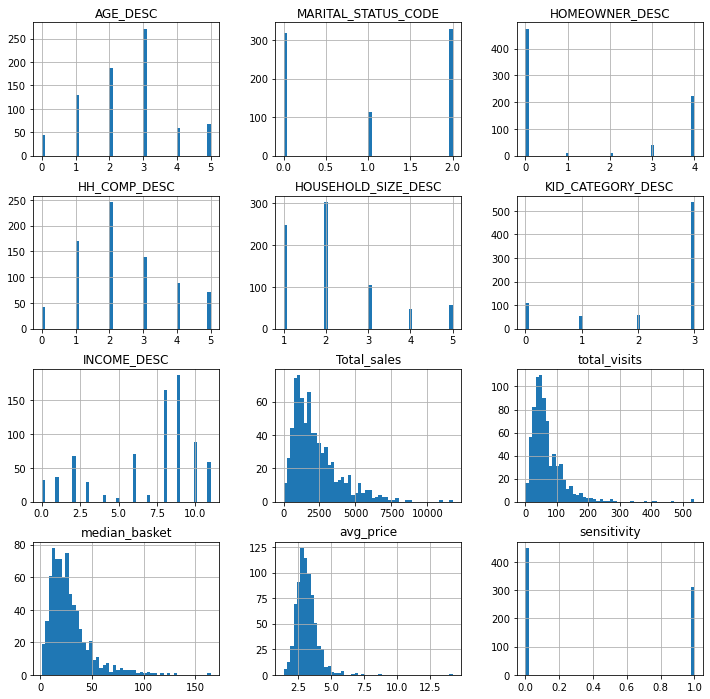

In [7]:
#histplot
df.hist(column=df.columns, figsize=(12,12),bins=50)

<AxesSubplot:>

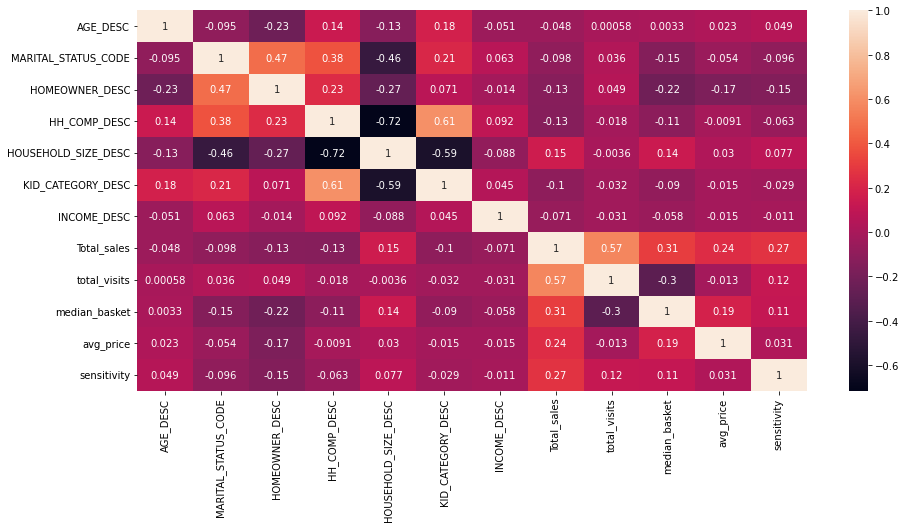

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

# Prepare X, y 

In [8]:
X=df.drop(columns=['sensitivity'])
y=df['sensitivity']

# Train test split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7,shuffle=True)

# Decision Tree Model

In [43]:
# tunning hyperparameters
scaler = PCA()

pipe = Pipeline(steps=[("scaler", scaler), ("Decision_Tree", DecisionTreeClassifier(random_state = 7))])

params_grid = {
    "scaler__n_components": [5,6,7],
    "Decision_Tree__max_depth": list(range(6,10)),
    "Decision_Tree__max_features" : [2,3,4,"auto","sqrt","log2"],
    "Decision_Tree__min_samples_leaf": [2,3,4,5],
    "Decision_Tree__criterion": ["gini", "entropy"]
    }


grid_search = GridSearchCV(pipe, params_grid, cv=5,verbose=2, n_jobs = -1)
grid_search.fit(X_train, y_train)

print(f'Score: {grid_search.best_score_} \nBest params: {grid_search.best_params_}')

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Score: 0.6228070175438596 
Best params: {'Decision_Tree__criterion': 'entropy', 'Decision_Tree__max_depth': 6, 'Decision_Tree__max_features': 4, 'Decision_Tree__min_samples_leaf': 2, 'scaler__n_components': 6}


In [51]:
DecisionTree = DecisionTreeClassifier(
    random_state=7,
    criterion = 'entropy',
    max_depth = 6,
    max_features = 4,
    min_samples_leaf = 2
)

model = make_pipeline(PCA(n_components = 6), DecisionTree)

model.fit(X_train, y_train)

pred = model.predict(X_test)

def calculate_performance(y_true, y_pred):

    y_pred = np.round(y_pred)
    # Todo: return your error value like accuracy, f1score, ...
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred, average='macro'))
    print("Recall: ", recall_score(y_true ,y_pred, average='macro'))
    print("F1: ", f1_score(y_true , y_pred, average='macro'))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))

model = build_model(X_train, y_train)

calculate_performance(y_test, pred)

Accuracy:  0.6631578947368421
Precision:  0.6385135135135135
Recall:  0.6433220829315333
F1:  0.6401941058113385
Confusion matrix: 
 [[87 35]
 [29 39]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

scaler = PCA()

pipe = Pipeline(steps=[("scaler", scaler), ("Random_forest", RandomForestClassifier(random_state = 1 ))])

params_grid = {
    "scaler__n_components": [4,6,8],
    "Random_forest__n_estimators": [20,50],
    "Random_forest__max_depth" : [4,5,6,8],
    "Random_forest__min_samples_split" : [3, 4, 5, 6],
    "Random_forest__criterion": ["gini", "entropy"]
    }


grid_search = GridSearchCV(pipe, params_grid, cv=5,verbose=2)
grid_search.fit(X_train, y_train)

print(f'Score: {grid_search.best_score_} \nBest params: {grid_search.best_params_}')

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_fores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_fores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_fore

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_fores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_fores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_fores

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_fores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_fores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_fores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_fores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_fores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_fores

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest_

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_fores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_fores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_fores

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_for

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_f

[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=gini, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_for

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_sp

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=4, Random_forest__max_features=sqrt, Random_forest__min_samples_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.4s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.4s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=5, Random_forest__max_features=sqrt, Random_forest__min_samples_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=6, Random_forest__max_features=sqrt, Random_forest__min_samples_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.4s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=5, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6,

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_spli

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=4; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=4; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.0s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=6; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=50, scaler__n_components=8; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=2; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=4; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=auto, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=2, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=3, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=5, scaler__n_components=2; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_sp

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=50, scaler__n_components=2; total time=   0.1s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=4, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=5, Random_forest__n_estimators=100, scaler__n_components=8; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=6; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=20, scaler__n_components=8; total time=   0.0s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_spli

[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.2s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_split=6, Random_forest__n_estimators=100, scaler__n_components=6; total time=   0.3s
[CV] END Random_forest__criterion=entropy, Random_forest__max_depth=8, Random_forest__max_features=sqrt, Random_forest__min_samples_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [52]:
model = make_pipeline(
    PCA(n_components = 6),
    RandomForestClassifier(
        n_estimators = 20,
        criterion = 'gini', 
        max_features = 'auto', 
        max_depth = 4,
        min_samples_split = 6
    )
)

model.fit(X,y)

pred = model.predict(X_test)

calculate_performance(y_test, pred)

Accuracy:  0.7315789473684211
Precision:  0.7075300815111916
Recall:  0.6933461909353906
F1:  0.6984220845912048
Confusion matrix: 
 [[101  21]
 [ 30  38]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


# XGBoost

In [53]:
model = make_pipeline(PCA(n_components = 6), XGBClassifier())

model.fit(X_train, y_train)

pred = model.predict(X_test)

calculate_performance(y_test, pred)

Accuracy:  0.6157894736842106
Precision:  0.5787692307692307
Recall:  0.577145612343298
F1:  0.5777906304222094
Confusion matrix: 
 [[87 35]
 [38 30]]
